In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 100micro

In [3]:
modulation = 93 #Hz
loop_number = 10    
res = 1/3003004800

sam, sr , cycle_length = Adj9(res,modulation,loop_number)

In [4]:
sam

1614528

In [5]:
sr

3003022080

In [6]:
interval = cycle_length*1e6 #micro
interval

537.6344086021505

# AWG and Pulse files setup

In [7]:
AWG_Settings_100micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':3003022080,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\neg\100micro'
}

In [8]:
M8190A = VisaR(AWG_Settings_100micro,60000)

In [11]:
Initialization(M8190A,AWG_Settings_100micro)

Instruments Sampling Frecuency set to 3.00337920000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [16]:
M8190A.write('FREQ:RAST 3003022080')

21

In [9]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude': -2*60,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':-2*30,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_100micro= {
    'Name':'ProbeB_100micro',
    'Amplitude':2*30,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':6,
    'Sweep time':1,
    'Sweep Duration':0
}

In [50]:
ProbeB_100micro_empty= {
    'Name':'ProbeB_100micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [12]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\100micro'
}

In [13]:
PulseScheme_B_100micro =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [Pump_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\1nano'
}

In [47]:
AWG_Settings_100micro_empty= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3003022080,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100micro\empty B cycle'
}

In [51]:
PulseScheme_B_100micro_empty =  {
    'Name' : 'PulseScheme_B_100micro',
    'Pulse Scheme': [ProbeB_100micro_empty,ProbeB_100micro_empty],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

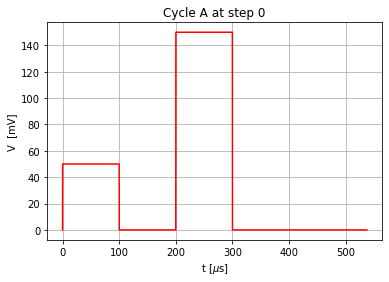

In [38]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro {g} step.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

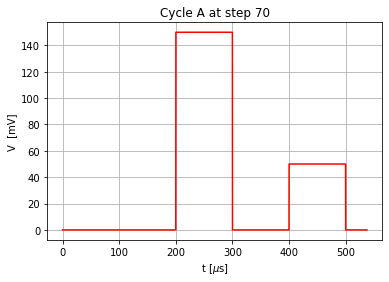

In [39]:
step = 70
pul1 = Sweep_teil(PulseScheme_A_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro {g} step.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

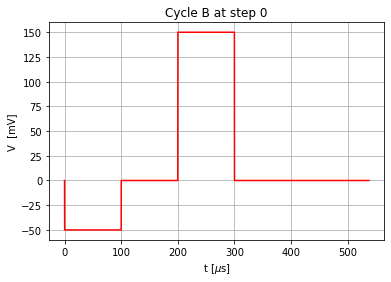

In [53]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro {g} step.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

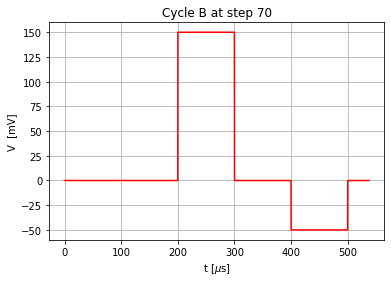

In [54]:
step = 70
pul1 = Sweep_teil(PulseScheme_B_100micro,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro, {g} step .png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

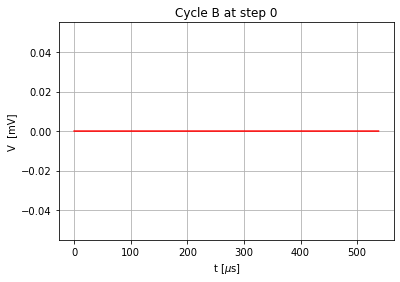

In [57]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_100micro_empty,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100micro {g} step empty.png'.format(g =  step, loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

In [25]:
interval*10

5376.344086021505

In [26]:
sam

1614528

In [66]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'A')[0]

In [67]:
sweeping_run_b_100micro = Sweeping_Single_List_File_teil(PulseScheme_B_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'B')[0]

In [68]:
#Exporting pickle

with open(r"{dict}\cycleA_71steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


with open(r"{dict}\cycleB_71steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro, h)

In [58]:
sweeping_run_b_100micro_empty = Sweeping_Single_List_File_teil(PulseScheme_B_100micro_empty,70,interval,sam,0,70,AWG_Settings_100micro_empty,'B')[0]

In [60]:
#Exporting pickle empty cycle

with open(r"{dict}\cycleB_31steps_93Hz_100micro_empty.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro_empty, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_runa_100microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [54]:
sweeping_run_a_100micro['Pulse File Location, at step 70']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100micro\\SegmentA_1614528_70.csv'

In [55]:
sweeping_run_b_100micro['Pulse File Location, at step 70']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100micro\\SegmentB_1614528_70.csv'

In [29]:
Sequence_File(M8190A,sweeping_run_a_100micro['Pulse File Location, at step 0'],sweeping_run_b_100micro['Pulse File Location, at step 0'],10)

Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND


8

In [23]:
loop_number

10

# Loading

In [69]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [36]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '200 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [70]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop5(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro_empty,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,loop_number)

Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 0 is 0.8188779464837773 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 1 is 0.8189180037697029 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 2 is 0.8210267008671986 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 3 is 0.8209947997444608 V
Sequence loaded with the following segment data "1,10,0,1,0,1614527,2,10,0,1,0,1614527" and the advancement method is COND
Average Value for measurement at step 4 is 0.8210327522141745 V
Sequence loaded with the following segment data "1,10,0,1,0,16145

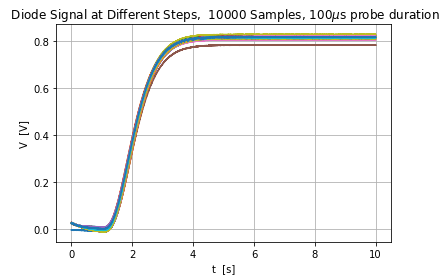

In [71]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [73]:
time_delay = np.linspace(-200,200,31)

In [ ]:
%matplotlib inline

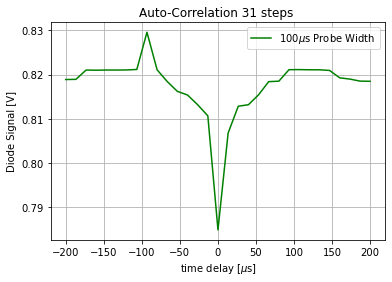

In [74]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [10]:
1/(45.45)

0.022002200220022

In [12]:
complete_time = 1/880

In [13]:
complete_time * 1e6

1136.3636363636363

In [38]:
modulation = 879 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.0005688282138794084

In [39]:
cycle_time *1e6 #micro seconds

568.8282138794084

In [40]:
cycle_time *1e9 #nano seconds

568828.2138794084

In [17]:
cycle_time2 = 0.0005681818181818182
comp_time2 = cycle_time2 * 2
mod2 = 1/comp_time2
mod2

880.0

In [18]:
full_cycle = 0.0005681818181818182
# loop_number = 
loop_number = full_cycle / 50
loop_number

1.1363636363636363e-05

In [22]:
round((cycle_time *1e9)/50)

11364

In [24]:
((cycle_time *1e9)/50) *50

568181.8181818181

In [25]:
round((cycle_time *1e9)/50) *50

568200

In [ ]:
568182 #total time length nano
50 #segment length
11377#loop number

In [41]:
568828/50

11376.56

In [37]:
50*11364

568200

In [44]:
1/(2*568828 *1e-9)

879.0003305041241

In [ ]:
samples = int(6720000000 * c)
samples

302

In [ ]:
samples/48

6.291666666666667

In [ ]:
sam = Granularity(samples)
sam

336

In [ ]:
adjusted_sr = int(sam/5e-8)

In [ ]:
adjusted_sr

6720000000

In [ ]:
6720000000

In [51]:
resolution = 1/6240000000

resolution

1.6025641025641025e-10

In [53]:
Adj(resolution,45.45,110000)

(672, 6719328000)

In [61]:
%matplotlib inline

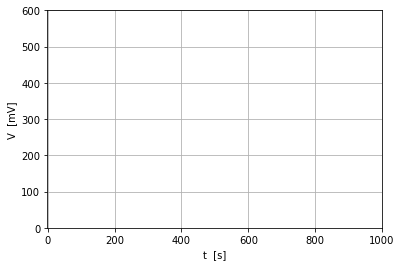

In [62]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import sweep0, Sweep
from Dictionaries import AWG_Settings1, Rabi, Probe1, PulsoG, Rabi2

#Pulse schemes



Pulses_List = [
    Rabi,Probe1
    ];

Pulses_List = [
    Rabi2,Probe1
    ];

PScheme=[
    PulsoG
    ]

#Plotting

plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1000), ylim=(0,600))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  Whe iterate over p and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,100,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps P


In [ ]:
Adj(45,220000)

In [11]:
def Adj1(modulation,repetitions):
    """
    240 minimum length
    """

    time_length_segment = Tc(modulation,repetitions)

    minimum_sample_length = 240 

    sampling_frequency0 = int(minimum_sample_length / time_length_segment)

    return minimum_sample_length,sampling_frequency0, time_length_segment

In [24]:
sam,sr, interval = Adj1(880,220000)

In [25]:
sam

240

In [26]:
sr

92928000000

In [27]:
interval

2.5826446280991735e-09

In [23]:
complete_time_length = 2*interval *220000
modulation = 1/complete_time_length
modulation

45.0

In [33]:
def is_in(x):
    if x in range(10,25):
        print(x,'is in the',range(10,25))
    else:
        print(x,'is not in the',range(10,25))

In [35]:
is_in(9)

9 is not in the range(10, 25)


In [38]:
def Adj_minimum2(modulation,repetitions):
    """ This function returns the proper sampling frequency and segment time length for waveforms with 240 samples, given the desired modulation frequency and number of repetitios
    

    modulation: int, desired modulation frequenxy in Herz to be used as a reference signal in the Lock-In Amplifier
    repetitions: int, desired number of repetitions (loop number). the total duration of one cycle will be split into this number
    """

    time_length_segment = Tc(modulation,repetitions)

    sample_length = 240 

    sampling_frequency0 = int(sample_length / time_length_segment)

    while  not sampling_frequency0 in range(125000000,8000000000+1):
        sample_length =sample_length  + 48
        sampling_frequency0 = int(sample_length / time_length_segment)

    return sample_length, sampling_frequency0, time_length_segment

In [50]:
def Adj9(resolution,modulation,repetitions):
    """
    240 minimum length
    """

    time_length_segment = Tc(modulation,repetitions)

    samples0,sampling_frequency0 = Param(time_length_segment,resolution)

    if samples0 < 240 :
        samples0 = 240
        sampling_frequency0 = int(samples0/time_length_segment)
        return samples0,sampling_frequency0

    else :
        if div(samples0) == True:
            return samples0,sampling_frequency0
        else:
            adjusted_samples = Granularity(samples0)
            adjusted_sr = int(adjusted_samples/time_length_segment)

            return adjusted_samples, adjusted_sr

In [42]:
Adj_minimum(880,220000)

(240, 1.4705882352941175e-10, 2.5826446280991735e-09)

In [43]:
def Adj_minimum(modulation,repetitions):
    """ This function returns the proper sampling frequency and segment time length for waveforms with 240 samples, given the desired modulation frequency and number of repetitios
    

    modulation: int, desired modulation frequenxy in Herz to be used as a reference signal in the Lock-In Amplifier
    repetitions: int, desired number of repetitions (loop number). the total duration of one cycle will be split into this number
    """

    time_length_segment = Tc(modulation,repetitions)

    minimum_sample_length = 240 

    sampling_frequency0 = 1/6800000000


    return minimum_sample_length,sampling_frequency0, time_length_segment

In [51]:
Adj9(180e-9,189,80000)

(240, 7257600000)

In [ ]:
2160000000

In [ ]:
7257600000